In [1]:
from coffea import hist
import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
plt.style.use(hep.style.CMS)

import awkward as ak

from matplotlib import colors
POPTS={'norm':colors.LogNorm()}

In [2]:
from data import getData, repackage
ldmx_dict = getData(chunks=True, fnames="/Users/chloeg/Desktop/kaons_pn_example.root")

In [3]:
ic=0
for chunk_dict in ldmx_dict:
    if ic==0: print(chunk_dict)
    ic+=1

[{Proc_id: 7, Sim_Kaon_pdgID: [310], Sim_Kaon_trkID: [3, ... 591, 591, 591, 591]}]


In [4]:
ldmx_dict = getData(chunks=True, fnames="/Users/chloeg/Desktop/kaons_pn_example.root")

In [5]:
hists = {}
hists["Target_kaon_hist"] = hist.Hist("Target SP Kaons",
                                hist.Cat("Ktype", "Type of Kaons"),      
                                hist.Bin("k", r"Kaon Kinetic Energy [MeV]", 40, 0, 4000)
                            )


In [6]:
def ProcessChunk(chunk, hists):
    ldmx_events = repackage(chunk)

    target_kaon = ldmx_events['Target_Kaon']
    
    masks_id = {'Kshort': 310,
                'Klong': 130,
                'Kpm': 321,
               }
    masses = {'Kshort': 497.648,
              'Klong': 497.648,
              'Kpm': 493.677
             }
    
    def flat(x,axis=None):
        try:
            return ak.to_numpy(ak.flatten(x,axis=axis)) 
        except:
            return x
    
    for part,pmask in masks_id.items():
        #part_mask = (abs(target_kaon.pdgID) == pmask)
        print(flat(target_kaon.e)-masses[part])
        hists["Target_kaon_hist"].fill(
                                     k=flat(target_kaon.e) - masses[part],
                                     Ktype= part
                                     )
   # print(part_mask)

In [7]:
nchunk = 0
for chunk in ldmx_dict:
    # I usually test my code in one chunck only
    #if nchunk >= 1: break
    print('process',nchunk)
    nchunk += 1
    ProcessChunk(chunk, hists)

process 0
[412.8122   391.85956    8.855377 ...  69.47815  283.5041   323.87585 ]
[412.8122   391.85956    8.855377 ...  69.47815  283.5041   323.87585 ]
[416.7832    395.83057    12.8263855 ...  73.44916   287.4751
 327.84686  ]


<Hist (Ktype,k) instance at 0x13413bc40>


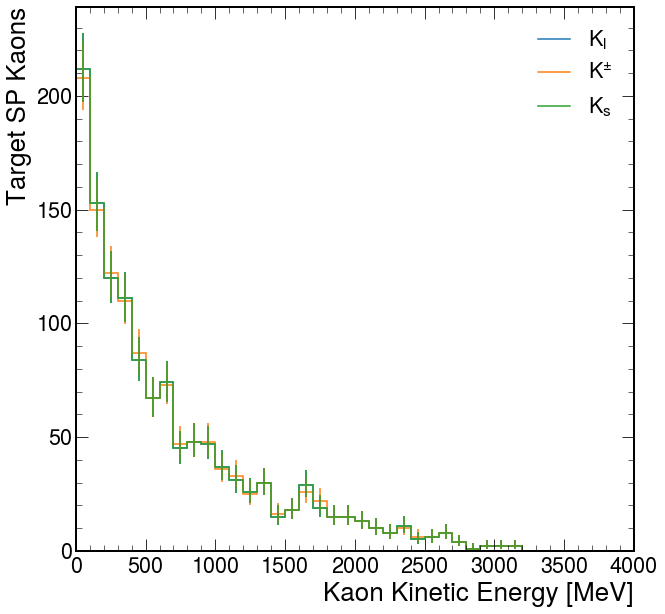

In [9]:
print(hists["Target_kaon_hist"])
fig, ax = plt.subplots()
hist.plot1d(hists["Target_kaon_hist"],ax=ax,clear=False);
leg = ax.legend([r'$K_l$',r'$K^{\pm}$',r'$K_s$'])